In [1]:
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/corpus_df_reddit_processed.csv")

In [3]:

# Clustering the data
# getting the labels dropped for clustering
X =  df.drop(columns=['Unnamed: 0'])
df.values
X

,0,000,1,10,100,1000,12,15,2,20,...,worth,would,wow,wrong,ye,yeah,year,yet,zero,zone
0,0,1,0,0,2,0,0,0,0,0,...,0,8,0,2,0,3,2,2,0,0
1,0,2,2,4,9,0,0,1,0,1,...,0,13,0,2,0,1,22,3,0,0
2,0,0,0,1,0,0,0,0,1,1,...,0,9,0,8,1,1,17,3,1,0
3,1,0,1,0,0,0,0,1,2,0,...,2,3,0,3,0,2,8,1,0,0
4,0,0,0,1,4,0,0,1,0,1,...,0,8,0,1,2,2,14,0,1,1
5,0,0,0,0,0,0,0,1,0,0,...,0,6,2,2,1,1,1,1,0,1
6,0,0,1,3,4,2,0,0,1,1,...,1,11,0,1,6,2,25,1,0,7
7,0,0,0,2,1,0,0,1,0,1,...,0,7,0,0,0,3,7,0,0,0
8,0,0,0,1,0,0,0,1,0,0,...,0,4,0,0,0,0,2,0,1,0
9,3,2,2,1,2,0,0,0,1,2,...,0,3,1,5,4,1,11,1,1,0


Cluster Counts:
cluster
2    30
0     3
1     2
Name: count, dtype: int64
Cluster Centers:
Cluster 0: [ 27.15958302 -14.46078099]
Cluster 1: [12.93639515 17.42295161]
Cluster 2: [-3.57838465  0.28454799]


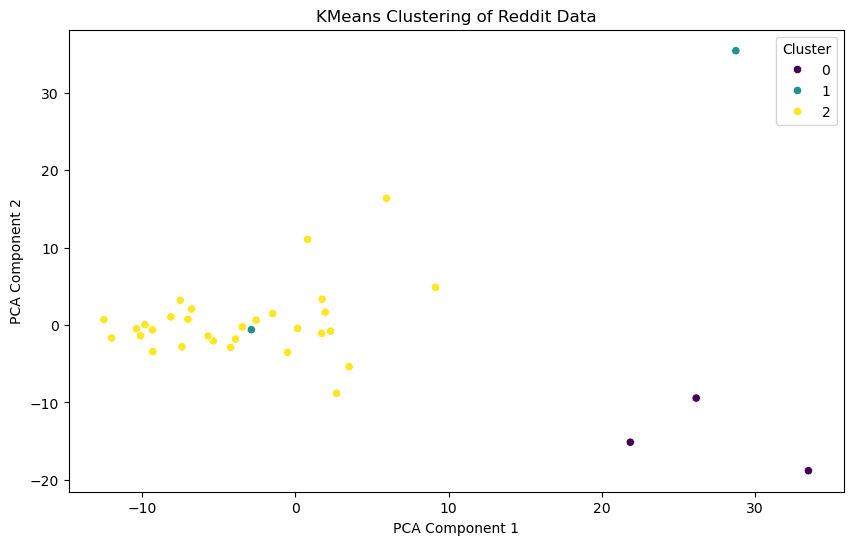

Explained Variance Ratio:
[0.12674232 0.07258786]
Total Explained Variance Ratio:
0.19933018005295883


In [4]:
## Clustering the reddit data

# Standardize the data
scaler = StandardScaler()
X =  df.drop(columns=['Unnamed: 0'])
X_scaled = scaler.fit_transform(X)
# Perform PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df["cluster"] = kmeans.fit_predict(X_scaled)
# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df["cluster"], palette="viridis")
plt.title("KMeans Clustering of Reddit Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")

## Also output information about the clusters
cluster_counts = df["cluster"].value_counts()
print("Cluster Counts:")
print(cluster_counts)


print("Cluster Centers:")
cluster_centers = kmeans.cluster_centers_
cluster_centers_pca = pca.transform(cluster_centers)
for i, center in enumerate(cluster_centers_pca):
    print(f"Cluster {i}: {center}")
plt.show()


##Show the information loss from PCA
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:")
print(explained_variance)
print("Total Explained Variance Ratio:")
print(sum(explained_variance))



In [5]:
## Identifying the 36 classes identified by the clustering
# Get the cluster labels
cluster_labels = df["cluster"].unique()
# Create a dictionary to hold the cluster dataframes
cluster_dataframes = {}
# Loop through each cluster label and create a dataframe for it
for label in cluster_labels:
    cluster_dataframes[label] = df[df["cluster"] == label]
# Print the first few rows of each cluster dataframe
for label, cluster_df in cluster_dataframes.items():
    print(f"Cluster {label}:")
    print(cluster_df.head())
    print("\n")

# Save the cluster dataframes to CSV files
for label, cluster_df in cluster_dataframes.items():
    cluster_df.to_csv(f"data/cluster_{label}.csv", index=False)
    print(f"Cluster {label} saved to CSV.")
# Save the plot


# Identifying the biggest cluster
biggest_cluster = cluster_counts.idxmax()
biggest_cluster_count = cluster_counts.max()
print(f"The biggest cluster is {biggest_cluster} with {biggest_cluster_count} samples.")

# port the biggest cluster to direct the next cells steps!

biggest_cluster_df = cluster_dataframes[biggest_cluster]
# Save the biggest cluster dataframe to CSV
biggest_cluster_df.to_csv("data/biggest_cluster.csv", index=False)
print(f"The biggest cluster dataframe saved to CSV.")
# Save the plot


Cluster 2:
          Unnamed: 0  0  000  1  10  100  1000  12  15  2  ...  would  wow  \
0        nottheonion  0    1  0   0    2     0   0   0  0  ...      8    0   
1         Futurology  0    2  2   4    9     0   0   1  0  ...     13    0   
2    clevercomebacks  0    0  0   1    0     0   0   0  1  ...      9    0   
3  LeopardsAteMyFace  1    0  1   0    0     0   0   1  2  ...      3    0   
4      climatechange  0    0  0   1    4     0   0   1  0  ...      8    0   

   wrong  ye  yeah  year  yet  zero  zone  cluster  
0      2   0     3     2    2     0     0        2  
1      2   0     1    22    3     0     0        2  
2      8   1     1    17    3     1     0        2  
3      3   0     2     8    1     0     0        2  
4      1   2     2    14    0     1     1        2  

[5 rows x 1002 columns]


Cluster 0:
           Unnamed: 0  0  000  1  10  100  1000  12  15  2  ...  would  wow  \
6            preppers  0    0  1   3    4     2   0   0  1  ...     11    0   
11  No

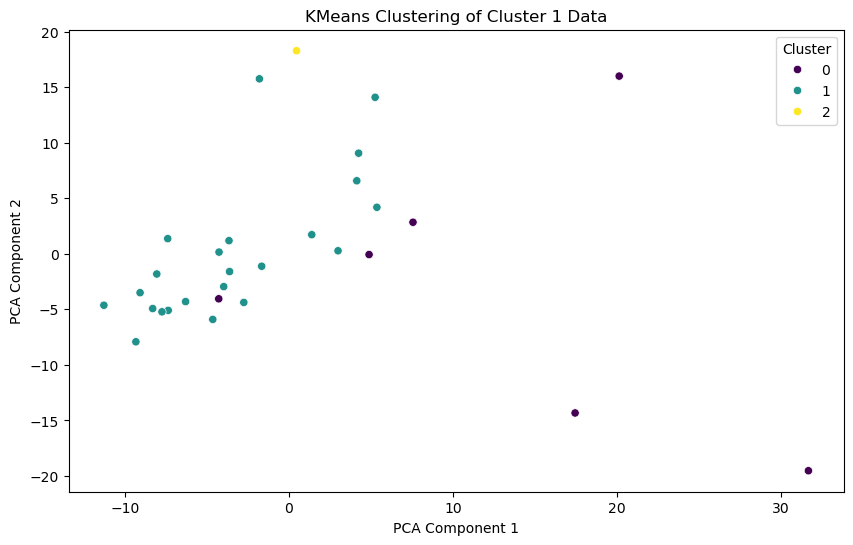

In [6]:
# Perform clustering on cluster_1.csv again to get a more refined clustering
df = pd.read_csv("data/biggest_cluster.csv")




# getting the labels dropped for clustering
X =  df.drop(columns=['Unnamed: 0'])    

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df["cluster"] = kmeans.fit_predict(X_scaled)
# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df["cluster"], palette="viridis")
plt.title("KMeans Clustering of Cluster 1 Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
# Save the plot
plt.show()

In [7]:
# Get the cluster labels
cluster_labels = df["cluster"].unique()
# Create a dictionary to hold the cluster dataframes
cluster_dataframes = {}
# Loop through each cluster label and create a dataframe for it
for label in cluster_labels:
    cluster_dataframes[label] = df[df["cluster"] == label]
# Print the first few rows of each cluster dataframe
for label, cluster_df in cluster_dataframes.items():
    print(f"Cluster {label}:")
    print(cluster_df.head())
    print("\n")


# Save the cluster dataframes to CSV files
for label, cluster_df in cluster_dataframes.items():
    cluster_df.to_csv(f"data/cluster_second_{label}.csv", index=False)
    print(f"Cluster {label} saved to CSV.")
# Save the plot

Cluster 1:
             Unnamed: 0  0  000  1  10  100  1000  12  15  2  ...  would  wow  \
0           nottheonion  0    1  0   0    2     0   0   0  0  ...      8    0   
1            Futurology  0    2  2   4    9     0   0   1  0  ...     13    0   
2       clevercomebacks  0    0  0   1    0     0   0   0  1  ...      9    0   
3     LeopardsAteMyFace  1    0  1   0    0     0   0   1  2  ...      3    0   
5  CreationNtheUniverse  0    0  0   0    0     0   0   1  0  ...      6    2   

   wrong  ye  yeah  year  yet  zero  zone  cluster  
0      2   0     3     2    2     0     0        1  
1      2   0     1    22    3     0     0        1  
2      8   1     1    17    3     1     0        1  
3      3   0     2     8    1     0     0        1  
5      2   1     1     1    1     0     1        1  

[5 rows x 1002 columns]


Cluster 2:
      Unnamed: 0  0  000  1  10  100  1000  12  15  2  ...  would  wow  wrong  \
4  climatechange  0    0  0   1    4     0   0   1  0  ...      8

/var/folders/0m/dnl9zvc16c54thvr_c4qqrt40000gn/T/ipykernel_72053/3818547441.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Cluster")


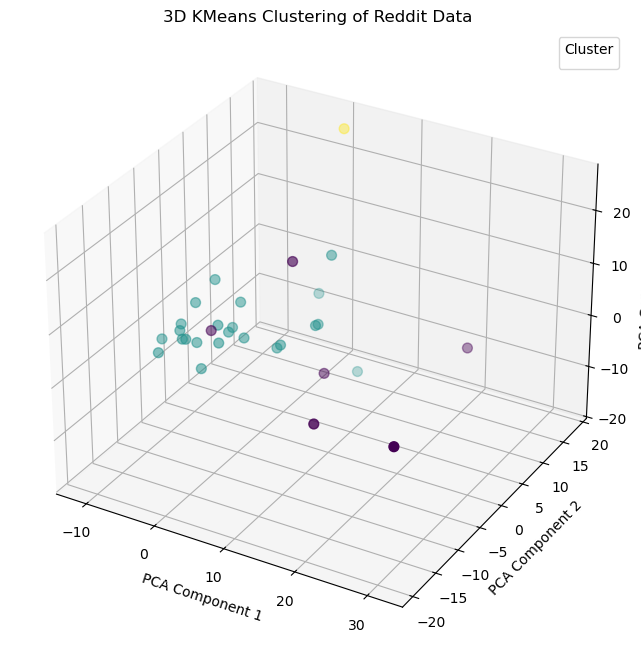

In [8]:
# Making a 3d plot of the clusters
from mpl_toolkits.mplot3d import Axes3D

# Perform PCA with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=df["cluster"], cmap='viridis', s=50)
ax.set_title("3D KMeans Clustering of Reddit Data")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
plt.legend(title="Cluster")
# show the plot
plt.show()




In [ ]:
#Bad Code Below - Don't judge or use it!

Decision Tree Classifier Accuracy: 0.40
Naive Bayes Classifier Accuracy: 0.25


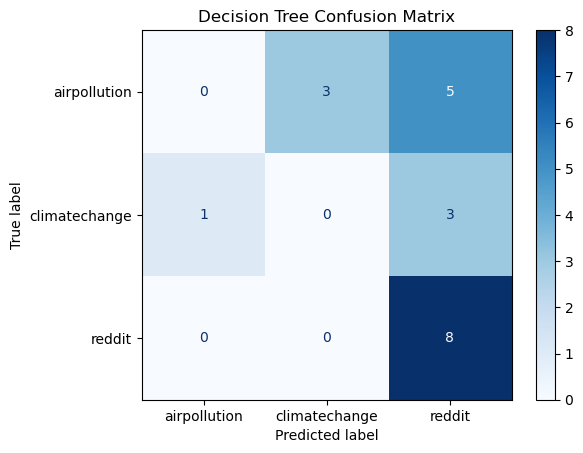

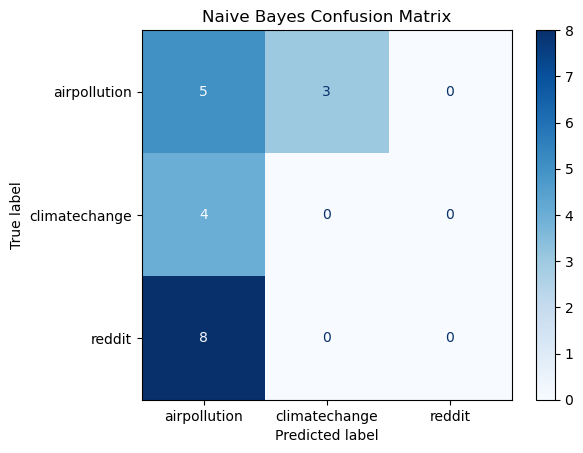

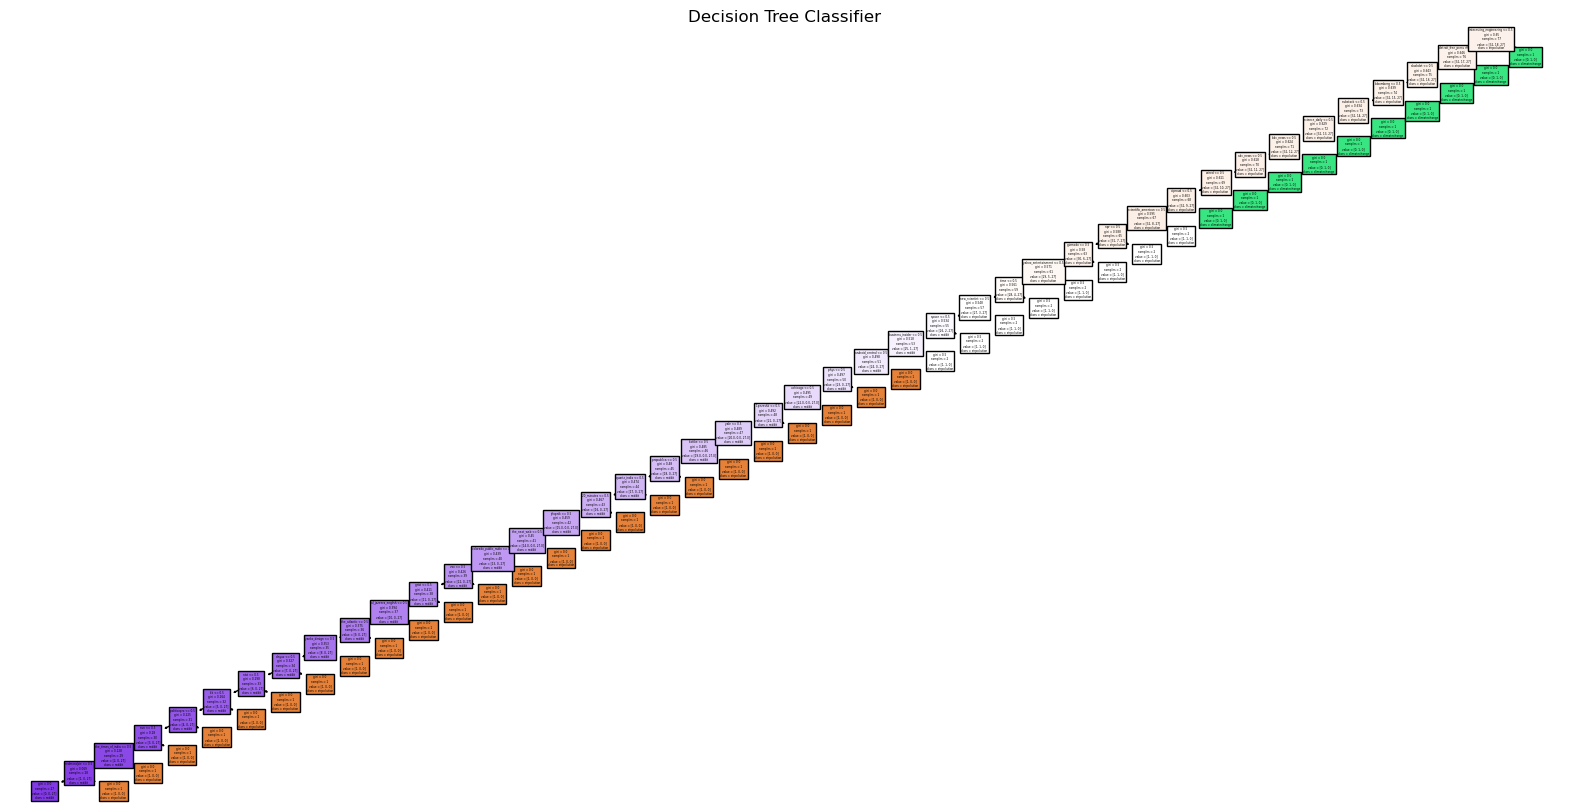

/var/folders/0m/dnl9zvc16c54thvr_c4qqrt40000gn/T/ipykernel_72053/4219182800.py:84: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_df["cluster"] = kmeans.fit_predict(X_scaled)


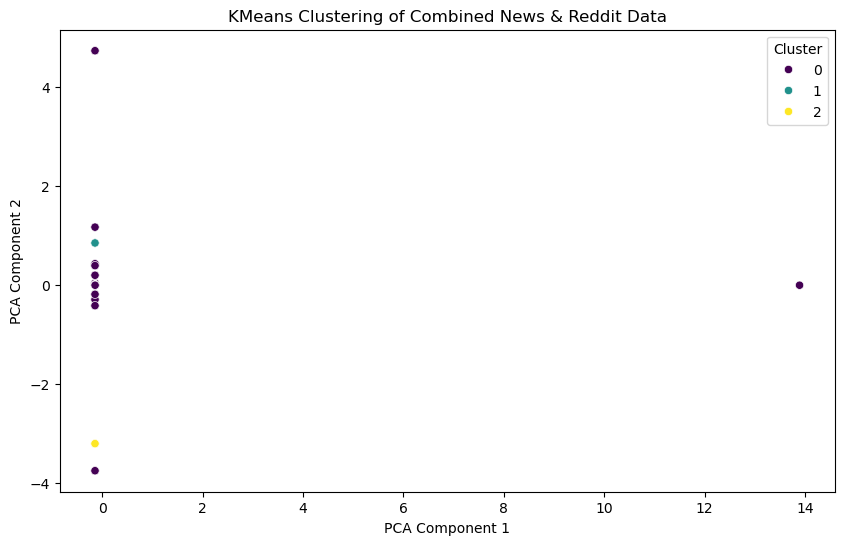

In [11]:
### take the news api content and make one dataframe with three classes, air pollution and climate change and climate related reddit posts, 
# then do test/train split and do the same as above

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load data
air_news_df = pd.read_csv("data/corpus_df_news_api_air_pollution_corpus.csv")
climate_news_df = pd.read_csv("data/corpus_df_news_api_climate_change_corpus.csv")
reddit_df = pd.read_csv("data/corpus_df_reddit_processed.csv")

# Add source label
air_news_df["source"] = "airpollution"
climate_news_df["source"] = "climatechange"
reddit_df["source"] = "reddit"

# Combine all data
combined_df = pd.concat([air_news_df, climate_news_df, reddit_df], ignore_index=True)

# Rename source to 'label' for classification
combined_df = combined_df.rename(columns={"source": "label"})

# If text column is not named, assume it's the second column
text_column = combined_df.columns[1] if combined_df.columns[0] == "label" else combined_df.columns[0]

# Fill NaNs
combined_df = combined_df.fillna("")

# Vectorize the text data
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(combined_df[text_column])
y = combined_df['label']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### ---- CLASSIFICATION ---- ###

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
dt_accuracy = dt_classifier.score(X_test, y_test)
print(f"Decision Tree Classifier Accuracy: {dt_accuracy:.2f}")

# Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)
nb_accuracy = nb_classifier.score(X_test, y_test)
print(f"Naive Bayes Classifier Accuracy: {nb_accuracy:.2f}")

# Confusion Matrices
cm_dt = confusion_matrix(y_test, y_pred_dt, labels=dt_classifier.classes_)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=dt_classifier.classes_)
disp_dt.plot(cmap=plt.cm.Blues)
plt.title("Decision Tree Confusion Matrix")
plt.show()

cm_nb = confusion_matrix(y_test, y_pred_nb, labels=nb_classifier.classes_)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=nb_classifier.classes_)
disp_nb.plot(cmap=plt.cm.Blues)
plt.title("Naive Bayes Confusion Matrix")
plt.show()

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, filled=True, feature_names=vectorizer.get_feature_names_out(), class_names=dt_classifier.classes_)
plt.title("Decision Tree Classifier")
plt.show()

### ---- CLUSTERING (optional) ---- ###
# PCA for clustering visualization
X_scaled = StandardScaler(with_mean=False).fit_transform(X)  # with_mean=False because sparse
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled.toarray())

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
combined_df["cluster"] = kmeans.fit_predict(X_scaled)

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=combined_df["cluster"], palette="viridis")
plt.title("KMeans Clustering of Combined News & Reddit Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()



Silhouette Score: 0.00


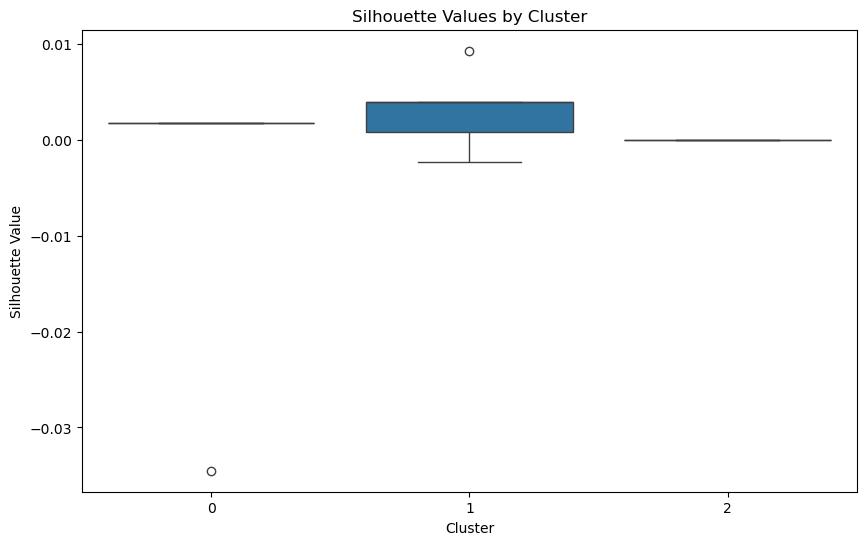

In [ ]:

#############################################
## Silhouette and clusters
#############################################

# Calculate the silhouette score

# Ensure X_scaled and df["cluster"] have the same number of samples
X_scaled = X_scaled[:len(df["cluster"])]

# Calculate the silhouette score
silhouette_avg = silhouette_score(X_scaled, df["cluster"])
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Calculate the silhouette samples
sample_silhouette_values = silhouette_samples(X_scaled, df["cluster"])
# Create a DataFrame for the silhouette values
silhouette_df = pd.DataFrame({
    "sample": range(len(sample_silhouette_values)),
    "silhouette_value": sample_silhouette_values,
    "cluster": df["cluster"]
})
# Plot the silhouette values
plt.figure(figsize=(10, 6))
sns.boxplot(x="cluster", y="silhouette_value", data=silhouette_df)
plt.title("Silhouette Values by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Silhouette Value")
plt.show()